In [1]:
# Load libraries
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import urllib
from pathlib import Path
import os
import urllib
#import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = 50

In [2]:
test_path = './raw/test.csv'
train_path = './raw/train.csv'

In [3]:
def load_set_data(target_month, outlier_cutoff, income_cutoff, path):
    relative_path = path
    cur_wd = os.getcwd()
    file_path = cur_wd + relative_path

    if not Path(file_path).exists():
        print('Filepath does not exist in the "raw" folder. Check again')

    else:
        print('Loading and cleaning data.')

    d_types = {'ID': str, 'Customer_ID': str, 'Month': str, 'Name': str, 'Age': int, 'SSN': str, 'Occupation': str, 'Annual_Income': str, 'Monthly_Inhand_Salary': float, 'Num_Bank_Accounts': int, 'Num_Credit_Card': int, 'Interest_Rate': int, 'Num_of_Loan': int,'Type_of_Loan': str,
'Delay_from_due_date': int, 'Num_of_Delayed_Payment': int, 'Changed_Credit_Limit': float, 'Num_Credit_Inquiries': float, 'Credit_Mix': str, 'Outstanding_Debt': str, 'Credit_Utilization_Ratio': float, 'Credit_History_Age': float, 'Payment_of_Min_Amount': str, 'Total_EMI_per_month': float,
       'Amount_invested_monthly': float, 'Payment_Behaviour': str, 'Monthly_Balance':float, 'Credit_Score':str}


    df = pd.read_csv(file_path)

    # Data cleaning, type conversion and filtering DataFrame
    # remove underscores and convert 'Annual Income' column from string to float
    df['Annual_Income'] = df['Annual_Income'].str.replace('_', '').astype(float)

    # filter out rows where 'Num_Credit_Inquiries' is blank and convert to integer
    df = df[df['Num_Credit_Inquiries'].notna()]
    df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype(int)

    # filter out rows where 'Credit_Mix' has underscores
    df = df[~df['Credit_Mix'].str.contains('_')]

    # remove underscores and convert 'Outstanding_Debt' column from string to float
    df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '').astype(float)

    # no changes required for "Credit_Utilization_Ratio"

    # further filtering based on specific conditions
    df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_', '').astype(float)
    single_month_frame = df[df['Month'] ==  target_month]
    single_month_frame = single_month_frame[single_month_frame['Type_of_Loan'] !=  'Auto Loan']
    single_month_frame = single_month_frame[single_month_frame['Amount_invested_monthly'] < outlier_cutoff]
    single_month_frame = single_month_frame[single_month_frame['Annual_Income'] < income_cutoff]


    return single_month_frame

In [4]:
# checking data cleaning, type conversion and filtering DataFrame for April

# Load data for April with specified cutoffs
target_month = 'April'
outlier_cutoff = 10000
income_cutoff = 500000
path = train_path
import os
current_directory = os.getcwd()
print(current_directory)
print(path)

# Call the function to get the filtered DataFrame
april_data = load_set_data(target_month, outlier_cutoff, income_cutoff, path)

# Print the number of rows
print(f'Number of rows for {target_month}:', len(april_data))

c:\Users\adith\OneDrive\Documents\DSI\Group_project_2\team_project_2\data
/raw/train.csv
Loading and cleaning data.
Number of rows for April: 8777


C:\Users\adith\AppData\Local\Temp\ipykernel_19116\2508348448.py:17: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


END OF CLEAN.

### Starting Deep Learning model

In [5]:
file_path_cs_class =  'raw/train.csv'
if not Path(file_path_cs_class).exists():
    print('Filepath does not exist in the "raw" folder. Check again')
else:
    print('Loading and cleaning data.')


pd_cs_class = pd.read_csv(file_path_cs_class)

features = ['Annual_Income','Num_Credit_Inquiries','Outstanding_Debt','Annual_Income',
              'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
              'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month' ]

Loading and cleaning data.


C:\Users\adith\AppData\Local\Temp\ipykernel_19116\3925847333.py:8: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  pd_cs_class = pd.read_csv(file_path_cs_class)


<H4><i> Set function to quickly clean data </i></H4>

In [6]:
# Data cleaning, type conversion and filtering DataFrame
def clean_data( dataframe , features ):

  # remove underscores and convert 'Annual Income' column from string to float

  for f in features:
    pd_cs_class = dataframe[dataframe[f].notna()]

  # Check the data type of 'Annual_Income'
  print(pd_cs_class['Annual_Income'].dtype)

  # If 'Annual_Income' is not already a string, convert it
  if pd_cs_class['Annual_Income'].dtype != 'object':
      pd_cs_class['Annual_Income'] = pd_cs_class['Annual_Income'].astype(str)

  # Now apply the string replacement and type conversion
  pd_cs_class['Annual_Income'] = pd_cs_class['Annual_Income'].str.replace('_', '').astype(float)

  pd_cs_class['Num_Credit_Inquiries'] = pd_cs_class['Num_Credit_Inquiries'].astype(int)
  # filter out rows where 'Credit_Mix' has underscores
  pd_cs_class = pd_cs_class[~pd_cs_class['Credit_Mix'].str.contains('_')]

  # Check the data type of 'Outstanding_Debt' before applying string operations
  print(pd_cs_class['Outstanding_Debt'].dtype)

  # If it's already numeric, you don't need to remove underscores or convert it.
  # If it's a mix of numeric and non-numeric, handle the non-numeric values appropriately before converting to float.
  # For example, you could replace non-numeric values with NaN and then convert to float:
  pd_cs_class['Outstanding_Debt'] = pd_cs_class['Outstanding_Debt'].replace('[^0-9.]', '', regex=True).astype(float)

  pd_cs_class = pd_cs_class[pd_cs_class['Annual_Income'] < income_cutoff]

  print(len(pd_cs_class))
  
  return pd_cs_class

object
object
65842


<H4><i>Scale and feature transformation, including encoding target variable</i></H4>

In [ ]:
pd_cs_class = clean_data( pd_cs_class , features )

scaler = MinMaxScaler()
pd_cs_class[features] = scaler.fit_transform(pd_cs_class[features])

df_X = pd_cs_class[features]

df_y = pd_cs_class['Credit_Score']
cs_mapping = {
    'Good': 3,
    'Standard':2,
    'Poor':1
}
df_y = df_y.map(cs_mapping)

<H4><i><b>Split data for training</b></i></H4>

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df_X,df_y,test_size=0.2,random_state=42)

In [12]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers

# Set random seed for reproducability
tensorflow.random.set_seed(0)

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

Libraries imported.
Keras version: 2.10.0
TensorFlow version: 2.10.0


In [13]:
# Set data types for float features
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Set data types for categorical labels
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print('Ready...')

Ready...


<H4><i>Setting up model and layers</i></H4>
 <H5>Multiple dense layers chosen with softmax-activated final layer for probabilistic output</H5>

In [14]:
# Define a classifier network
hl = 1024 # Number of hidden layer nodes

model = Sequential()
model.add(Dense(hl, input_dim=len(features), activation='relu'))
model.add(Dense(hl, activation='relu'))
model.add(Dense(hl, activation='relu'))
model.add(Dense(hl, activation='relu'))
model.add(Dense(hl, activation='relu'))
model.add(Dense(hl, activation='relu'))
model.add(Dense(hl, activation='relu'))
model.add(Dense(4, input_dim=hl, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              13312     
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_6 (Dense)             (None, 1024)              1

In [15]:
#hyper-parameters for optimizer

opt = optimizers.Adam()

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train the model over 5 epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 5
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/5
5268/5268 [==============================] - 81s 15ms/step - loss: 0.8581 - accuracy: 0.5935 - val_loss: 0.8266 - val_accuracy: 0.6034
Epoch 2/5
5268/5268 [==============================] - 76s 14ms/step - loss: 0.8277 - accuracy: 0.6071 - val_loss: 0.8249 - val_accuracy: 0.6106
Epoch 3/5
5268/5268 [==============================] - 76s 14ms/step - loss: 0.8222 - accuracy: 0.6111 - val_loss: 0.8185 - val_accuracy: 0.6160
Epoch 4/5
5268/5268 [==============================] - 76s 14ms/step - loss: 0.8178 - accuracy: 0.6137 - val_loss: 0.8137 - val_accuracy: 0.6154
Epoch 5/5
5268/5268 [==============================] - 76s 14ms/step - loss: 0.8144 - accuracy: 0.6160 - val_loss: 0.8141 - val_accuracy: 0.6161


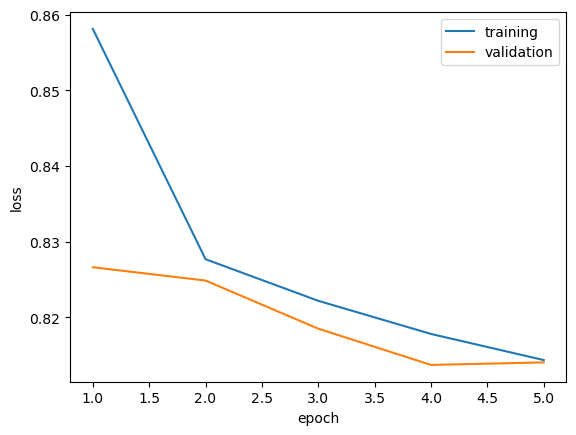

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [17]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print('------------\nWeights:\n',weights,'\nBiases:\n', biases)

------------
Weights:
 [[-0.03394852 -0.0211315  -0.06211228 ...  0.02250853  0.05593185
  -0.1290032 ]
 [ 0.06096967 -0.00482667  0.02649536 ... -0.04916072  0.04649954
  -0.00367858]
 [-0.01572555  0.0138066  -0.05885543 ... -0.01689259 -0.08460227
  -0.08569903]
 ...
 [ 0.00465585  0.02499375  0.0591558  ... -0.01444725 -0.05440122
   0.02260673]
 [-0.00143086 -0.03070187 -0.07541994 ...  0.00476647 -0.00544577
  -0.18446194]
 [-0.02508558  0.01226515  0.03273484 ...  0.07272877 -0.06559534
  -0.03973404]] 
Biases:
 [-0.06132194 -0.03655506 -0.13579164 ... -0.08053738 -0.01189508
 -0.10412475]
------------
Weights:
 [[-0.04042294  0.02987398  0.00844081 ... -0.0466167   0.03644856
   0.01721438]
 [ 0.0075969   0.03946683  0.03221946 ... -0.04761482  0.02809292
  -0.01638358]
 [-0.00270799  0.0333448   0.06381196 ... -0.06424166 -0.05935728
  -0.06109473]
 ...
 [-0.01589879 -0.0507902   0.02663763 ...  0.03416301  0.04252313
  -0.01021891]
 [ 0.0560131  -0.02697372 -0.03906254 ...  0

412/412 [==============================] - 2s 6ms/step


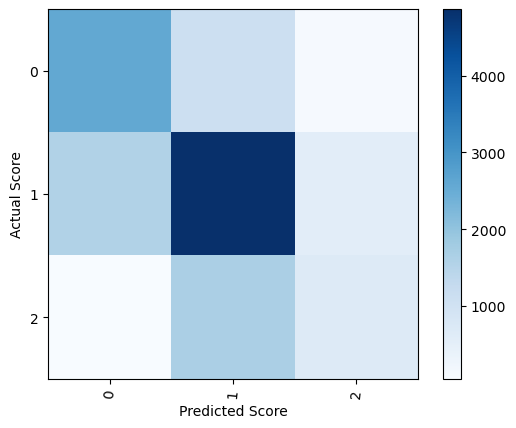

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks,  rotation=85)
plt.yticks(tick_marks, )
plt.xlabel("Predicted Score")
plt.ylabel("Actual Score")
plt.show()